# Loss Functions and Gradient Descent

Loss functions are the foundation and measure by which machine learning algorithms are optimized.  The value of the loss function is a measure of how good the model 'coefficients' (we'll call these **paramaters**, or **betas** from now on) are at fitting the underlying data.  

An intuitive understand of the loss function will depend on the sort of problem we're trying to optimize.  If we're trying to run a regression to predict housing prices, the loss function will be based off the error between the true and predicted home prices.  If we're trying to classify credit defaults, the loss function will be a measure of how accurate our predictions are at identifying the bad loans.  Intuitive!

A machine learning algorithm will be finished optimizing when it finds a set of parameters that minimize the loss.  When our machine learning algorithm has a **convex** loss function, it has a single optimal set of parameters that will minimize its loss function. Convex loss functions are like a basin. Given enough iterations, our algorithm will fall into the set of parameters that result in the lowest possible loss.

Consider the figure on the left below.  If you were looking at the convex plane from the top-down, the 'X' and 'Y' would be two possible model parameters.  With enough iterations, the parameters will minimize model loss.  This won't mean we found the 'best' model -- I'll cover **overfitting** in later posts and how we can control for it.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

In [4]:
Image(url= "https://image.slidesharecdn.com/mlconf2015-sf-anandkumar\
-151114002155-lva1-app6892/95/animashree-anandkumar-electrical-engine\
ering-and-cs-dept-uc-irvine-at-mlconf-sf-111315-10-638.jpg?cb=14474606\
04", width=700, height=500)

The above figure to the right shows the loss function of a non-convex algorithm.  You can see there are multiple local optimums that our algorithm can fall into. In the following posts, we'll cover which machine learning algorithms are convex or non-convex, and we'll code up some possible resolutions to these scenarios.

## Gradient Descent

Our machine learning algorithms knows which direction to travel along the convex plane through a process called gradient descent. To find a local minimimum of our loss funtion using gradient descent, the algorithm takes steps proportional to the negative of the derivative of the function at the current point. 

In other words, we use the slope of our loss function at a given point to figure out 2 things:
- Which direction we should adjust our parameters
- How large our parameter adjustment should be

If we find outselves on a steep portion of the loss function plane, we take large steps.  When the slope of our loss function is shallow, we move slowly.  Eventually we'll reach a point where our slope is practically zero and our algorithm will stop.

In practice many of these algorithms have a step size cut-off, whereby if the step is calculcated to be below a certain size it'll stop traversing.  The consequence of this will be that these algorithms don't necessarily find the **absolute** lowest point, but something close enough.  This isn't actually a bad thing-- In fact, when we cover overfitting in later chapters I'll show how this is actually desired. 

In [5]:
Image(url= "https://qph.ec.quoracdn.net/main-qimg-b7a3a254830ac3748\
18cdce3fa5a7f17", width=700, height=500)

For our coded example, we'll be optimizing a one dimensional loss function. We'll be finding the parameter (w) which minimizes the loss function.  We'll traverse along the cost function by 

But first, we'll be loading our basic packages. 

In [13]:
import numpy as np
#from math import sin
import pylab 
#import matplotlib.pyplot as plt
#%matplotlib inline

To get a little more visibility into our algorithm, we've hard-coded the loss function and its derivative as inputs into our gradient descent algorithm.

Like the above figure, our loss function is defined as w^2.  We'll be expecting our algorithm to find loss minimized around 0 or close to it. 

In [17]:
def loss_func(w):
    return np.power(w, 2)

The derivative of w^2 is of course, 2\*w.  We'll be using the derivative to find which direction we need to traverse along our loss function

In [18]:
def gradient_func(w):
    return 2*w

And finally, we have the code for our gradient descent function.  Step by step what it does is below:

1. Initialize a random point to begin our dscent
2. Initialize our array of guesses and derivatives (for plotting our descent)
3. For our random point, record the loss and gradient
4. Move in the opposite direction of our gradient by a distance proportional to the gradient and our programmed step size
5. As long as our movement is greater than our minimum movement, repeat steps 3-5 with our new point.

In [19]:
def gradient_descent(loss_func, gradient_func, step, resolution, guess):
    old_guess = 99999
    guesses = []
    derivatives = []
    while abs(old_guess - guess) > resolution:
        error = loss_func(guess)
        derivative = gradient_func(guess)
        move = derivative * step
        old_guess = guess
        guess = guess - move
        guesses.append(guess)
        derivatives.append(derivative)
    pylab.plot(guesses, label='Values')
    pylab.plot(derivatives, label='Derivatives')
    pylab.legend(loc='upper right')
    pylab.show()
    return guess, error

Below we run our code

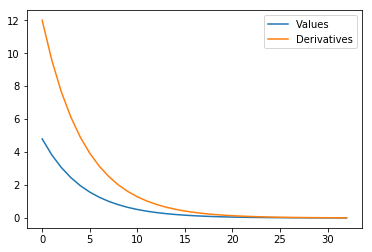

Best approximation of local minimum is 0.00380295180068
Error is 2.25975662474e-05


In [20]:
guess, error = gradient_descent(loss_func, gradient_func, step=0.1, 
                                resolution=0.001, guess=6)

print "Best approximation of local minimum is", guess
print "Error is", error

As I stated previously, our gradient descent process didn't find the lowest point in our loss function.  With a greater minimum movement input, we could reach closer and closer to zero.

## Summary

I hope after this little tutorial you're more comfortable with the idea of loss functions and the process to minimizes their loss. I hear its not entirely common to start learning about machine learning with this concept, but I'm dumbfounded to think theres a better way. 